In [1]:
# jupyter tricks
from IPython.core.display import display, HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.spatial.distance as dst

# Distances & Classification & PCA
### You can call it lingebra (linear algebra)

## Part 6 - Distances

### What is a distance?

### How about Manhattan
$d(x,y) = \sum_{i=1}^{k}|x_i-y_i|$

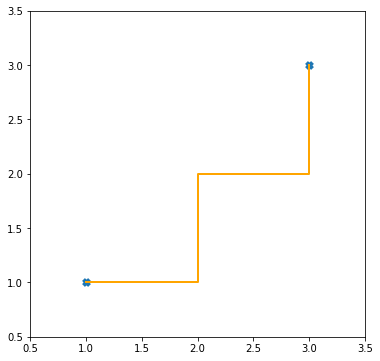

In [2]:
d = pd.DataFrame({'a': [1,2,2,3,3],'b': [1,1,2,2,3]})
_ = plt.figure(figsize = (6,6))
_ = plt.plot(d.a, d.b, color = 'orange', linewidth = 2)
_ = plt.scatter(d.a[[0,4]], d.b[[0,4]], marker = 'x', linewidth = 4)
_ = plt.ylim((0.5, 3.5))
_ = plt.xlim((0.5, 3.5))

### Euclidean
$d(x,y) = \sum_{i=1}^{k}\sqrt{(x_i-y_i)^2}$

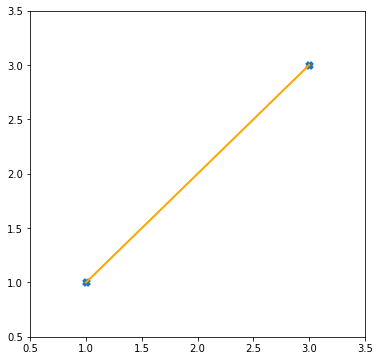

In [3]:
e = pd.DataFrame({'a': np.linspace(1,3,21), 'b': np.linspace(1,3,21)})
_ = plt.figure(figsize = (6,6))
_ = plt.plot(e.a, e.b, color = 'orange', linewidth = 2)
_ = plt.scatter(e.a[[0,20]], e.b[[0,20]], marker = 'x', linewidth = 4)
_ = plt.ylim((0.5, 3.5))
_ = plt.xlim((0.5, 3.5))

### Non-numerical data?
- similarity
<br><br>
- hamming
    - $H(x,y) = \sum_{i=1}^{k} 1_{x_{i} \ne y_{i}}$
<br><br>
- for mixed data
    - scale dummies
    - Gower metric (scaled distances)
    - $G(x,y) = \frac{1}{k} \sum_{i=1}^{k} \frac{|x_{i} - y_{i}|}{range(var_i)} $

### Honorable mention - Cosine
$$d(x,y) = \frac{\sum_{i=1}^{k} x_{i}y_{i}}{\sqrt{\sum_{i=1}^{k} x_{i}^2} \sqrt{\sum_{i=1}^{k} y_{i}^2}}$$

### Curse of dimensionality (sparsity)

In [4]:
one = np.zeros(69)
one[:17] = 1

two = np.zeros(69)
two[9:26] = 1

print('euclidean =  ' + str(np.linalg.norm(one - two)))
print('limit     =  ' + str(np.sqrt(np.linalg.norm(one)**2 + np.linalg.norm(two)**2)))
print('cosine    =  ' + str(dst.cosine(one, two)))

euclidean =  4.242640687119285
limit     =  5.830951894845301
cosine    =  0.5294117647058824


## Part 7 - Classification

### What if we classify using distance?
The label from the closest point from training set will be used as prediction?

### kNN algorithm
- for each unlabeled point
    - find k nearest labeled points
    - assign (weighted) majority vote class
<br><br>
- lazy learning

<div style="float: left; width: 50%;"><br>
    <font size=3><b>advantages</b></font>
    <ul>
        <li>simple</li>
        <li>good performance for large data</li>
    </ul>
</div>

<div style="float: right; width: 50%;"><br>
    <font size=3><b>disadvantages</b></font><br>
    <ul>
        <li>greedy</li>
        <li>very costly for large data</li>
    </ul>
</div>

### How to determine K?

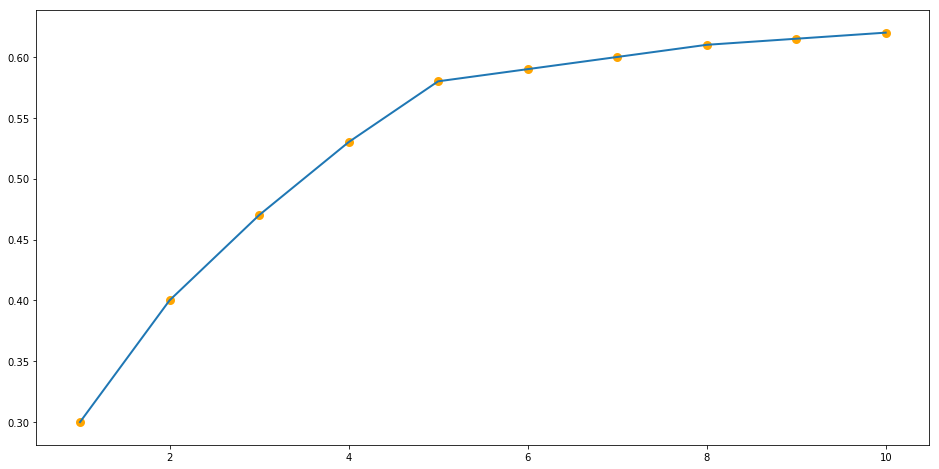

In [5]:
knee = pd.DataFrame(
    {'k': np.linspace(1,10,10),
     'acc': [0.3, 0.4, 0.47, 0.53, 0.58, 0.59, 0.60, 0.61, 0.615, 0.62]}
)
_ = plt.figure(figsize = (16, 8))
_ = plt.plot(knee.k, knee.acc, linewidth = 2)
_ = plt.scatter(knee.k, knee.acc, color = 'orange', linewidth = 3)

### Tips & Tricks - kNN in Python

In [6]:
"""
# Let's build first recommender!
# I have (semi-randomly) chosen user with ID = 21877
# (and I recommend you to use the same one for now)

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as knn_cls
x_tr, y_tr, x_te, y_te = train_test_split(x, y, size = 0.2) # usually either 10% or 20%

# find __k__ neighbors
knn = KNeighborsClassifier(n_neighbors = __k__, n_jobs= -1)
knn_trained = knn.fit(x_tr, y_tr)
knn_trained.score(x_te, y_te)
"""
display()

## Part 8 - PCA
- data transformation method
    - correlated variables into uncorrelated
- useful for dimension reduction
- produces new orthogonal "variables"
    - linear combination of the original ones

### The linear algebra part
- projections and multiplication
    - any (linear) transformation can be expressed as matrix multiplication
    - linear ~ no functions like $\sin{x}$, $\cos{x}$, or $x^2$
- eigen - vectors & values

### Components
- basically the **unit** eigenvectors of covariance matrix
- new **axes**
- sorted according to amount of variance explained
    - proportion of explained variance equals proportion of eigenvalues
    - first component captures the highest amount of variance
- dimension reduction = choosing **k** components

### Math behind
$C = covariance \; matrix \; k \times k$  
$w = vector, \; k \times 1, \; ||w|| = 1$  
$\lambda \in R$  

Lagrange, maximise:    
$L = w^{T}Cw - \lambda(w^{T}w - 1)$  
$\frac{\partial L}{\partial w} = 0 \Rightarrow Cw - \lambda w =0$  

Substitute back:  
$w^{T}Cw - \lambda(w^{T}w-1) = w^{T}Cw = \lambda w^{T} w = \lambda$


### Tips & Tricks - PCA in Python

In [7]:
"""
# Let's try express the 69 tags with small number of components!
# Will the kNN work better on PCA transformed table?

from sklearn.decomposition import PCA
pca = PCA().fit(x)
pca.explained_variance_ratio_
pca.components_

# choose __k__ components
x_pca = PCA(n_components = __k__).fit_transform(x)
"""
display()